In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.9.1'

In [70]:
fmnist = keras.datasets.fashion_mnist
type(fmnist)

module

In [78]:
(train_im, train_lb), (test_im, test_lb) = fmnist.load_data()

In [81]:
def view_data_pt(index, im=train_im, lb=train_lb, view_array=True):
    np.set_printoptions(linewidth=120)
    
    print(f'Label: {lb[index]}')
    if view_array:
        print(f'\nImage pixel array:\n{im[index]}')
    
    fig, ax = plt.subplots()
    ax.imshow(im[index])

Label: 9

Image pixel array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

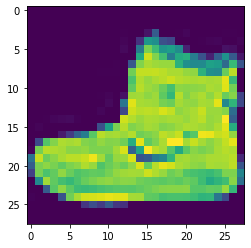

In [82]:
view_data_pt(0)

Label: 4

Image pixel array:
[[  0   0   0   0   0   0   0   0   0   0  90 156 177 182 196 176 117   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 239 253 239 214 226 214 231 245 248   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  36 241 203 219 192 190 193 207 200 232 135   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  33 167 227 229 234 228 234 244 215 211 214 208 120   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0 157 227 207 207 229 229 232 207 241 227 235 224 203 221 176   0   0   2   0   0   0   0]
 [  0   0   0   0   0  65 218 189 192 187 196 189 188 202 181 195 222 219 190 180 217 125   0   0   0   0   0   0]
 [  0   0   0   0   0 158 213 196 196 191 188 186 179 192 177 192 126 155 193 189 200 166   0   0   0   0   0   0]
 [  0   0   0   0   0 163 217 211 176 188 188 186 183 196 180 191 165 170 216 204 200 195   0   0   0   0   0   0]
 [  0   0   0   0   0 183 215 234 185 182 186 183 1

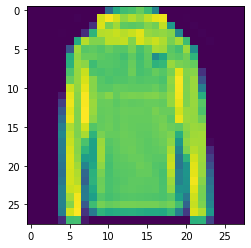

In [85]:
view_data_pt(24)

In [84]:
train_im = train_im / 255.
test_im = test_im / 255.

In [75]:
train_im.shape

(60000, 28, 28)

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=128, activation=tf.nn.relu),
    keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

In [87]:
inputs = np.array([[1., 4., -1., 0.]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax: {inputs.numpy()}')

outputs = keras.activations.softmax(inputs)
print(f'output of softmax: {outputs.numpy()}')

s = tf.reduce_sum(outputs)
print(f'sum of outputs: {s}')

pred = np.argmax(outputs)
print(f'class with highest P: {pred}')

input to softmax: [[ 1.  4. -1.  0.]]
output of softmax: [[0.04632042 0.93037047 0.00626879 0.01704033]]
sum of outputs: 1.0
class with highest P: 1


In [88]:
inputs = np.array([1., 4., -1., 0.])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax: {inputs.numpy()}')

# tf.nn.softmax() can handle 1D input, but keras.activations.softmax() cannot.
outputs = tf.nn.softmax(inputs)
print(f'output of softmax: {outputs.numpy()}')

s = tf.reduce_sum(outputs)
print(f'sum of outputs: {s}')

pred = np.argmax(outputs)
print(f'class with highest P: {pred}')

input to softmax: [ 1.  4. -1.  0.]
output of softmax: [0.04632042 0.93037047 0.00626879 0.01704033]
sum of outputs: 1.0
class with highest P: 1


In [98]:
out2 = np.exp(inputs)
out2 /= out2.sum()
print(out2)

[0.04632042 0.93037047 0.00626879 0.01704033]


In [89]:
print(type(outputs))
print(outputs)
outputs

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([0.04632042 0.93037047 0.00626879 0.01704033], shape=(4,), dtype=float64)


<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.04632042, 0.93037047, 0.00626879, 0.01704033])>

In [90]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=('accuracy',)
)

In [103]:
%%time

model.fit(train_im, train_lb, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8979
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9012
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9054
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9087
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2367 - accuracy: 0.9125
CPU times: total: 36.1 s
Wall time: 16 s


In [104]:
model.evaluate(test_im, test_lb)

313/313 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8836


[0.3321632146835327, 0.8835999965667725]

## Exercise 1

In [93]:
clsf = model.predict(test_im)

313/313 [==============================] - 0s 1ms/step


In [94]:
print(test_im.shape)
print(test_lb.shape)
print(clsf.shape)

(10000, 28, 28)
(10000,)
(10000, 10)


In [95]:
print(clsf[0])

[1.9041855e-06 6.1658376e-08 5.4579008e-08 7.9178131e-09 1.6633970e-09 4.0113134e-03 2.7924565e-07 4.7580907e-03
 4.2145280e-06 9.9122405e-01]


Label: 9


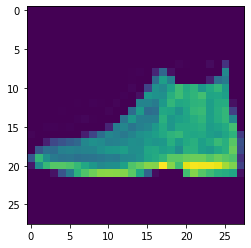

In [97]:
view_data_pt(0, test_im, test_lb, view_array=False)

## Exercise 2: More neurons in a layer

In [106]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im, train_lb, epochs=5)
model2.evaluate(test_im, test_lb)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4733 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3611 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3242 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2989 - accuracy: 0.8900
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8813
CPU times: total: 2min 10s
Wall time: 34.8 s


[0.3382132947444916, 0.8812999725341797]

In [107]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im, train_lb, epochs=5)
model2.evaluate(test_im, test_lb)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4693 - accuracy: 0.8311
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3559 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3219 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2950 - accuracy: 0.8908
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3491 - accuracy: 0.8729
CPU times: total: 3min 38s
Wall time: 53.4 s


[0.34906408190727234, 0.8729000091552734]

## Exercise 5: More than 1 layers

In [109]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im, train_lb, epochs=5)
model2.evaluate(test_im, test_lb)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4708 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3567 - accuracy: 0.8683
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3235 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8902
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8804
CPU times: total: 1min 12s
Wall time: 23.6 s


[0.3385586440563202, 0.8804000020027161]

## Exercise 6: More epochs help training, but not necessarily testing

In [110]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im, train_lb, epochs=15)
model2.evaluate(test_im, test_lb)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4680 - accuracy: 0.8306
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3542 - accuracy: 0.8700
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3221 - accuracy: 0.8808
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3010 - accuracy: 0.8882
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2796 - accuracy: 0.8956
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2649 - accuracy: 0.9017
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2529 - accuracy: 0.9057
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2428 - accuracy: 0.9084
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9137
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.222

[0.35687217116355896, 0.8895999789237976]

In [111]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im, train_lb, epochs=30)
model2.evaluate(test_im, test_lb)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4742 - accuracy: 0.8287
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3573 - accuracy: 0.8685
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3208 - accuracy: 0.8799
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2998 - accuracy: 0.8884
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8938
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2654 - accuracy: 0.8993
Epoch 7/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2532 - accuracy: 0.9056
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2428 - accuracy: 0.9086
Epoch 9/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2305 - accuracy: 0.9126
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.221

[0.48323696851730347, 0.8924999833106995]

## Exercise 7: Normalization helps

In [114]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im*255, train_lb, epochs=5)
model2.evaluate(test_im*255, test_lb)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1555 - accuracy: 0.7523
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6332 - accuracy: 0.7945
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5730 - accuracy: 0.8109
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5184 - accuracy: 0.8268
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.8212
CPU times: total: 1min 23s
Wall time: 26.4 s


[0.5005686283111572, 0.8212000131607056]

## Exercise 8: Early stopping by callbacks

In [126]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, ac_cap=1, loss=0):
        super().__init__()
        self.ac_cap = ac_cap
        self.loss = loss
        
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= self.ac_cap:
            print(f'\n\nReached {self.ac_cap*100:.1f}% accuracy so stopping training!\n')
            self.model.stop_training = True
        
        if logs.get('loss') <= self.loss:
            print(f'\n\nReached {self.loss:.3g}% loss so stopping training!\n')
            self.model.stop_training = True

In [127]:
%%time

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(train_im, train_lb, epochs=15, callbacks=[MyCallback(ac_cap=0.91, loss=0.2)])
model2.evaluate(test_im, test_lb)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4732 - accuracy: 0.8287
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3531 - accuracy: 0.8701
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3197 - accuracy: 0.8819
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.8898
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8951
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2641 - accuracy: 0.8997
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.9050
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2417 - accuracy: 0.9077
Epoch 9/15
1869/1875 [============================>.] - ETA: 0s - loss: 0.2288 - accuracy: 0.9133

Reached 91.0% accuracy so stopping training!

313/313 [==============================

[0.33177387714385986, 0.8817999958992004]